# MODEL TRAINING AND EVALUTION 

In [7]:
import pandas as pd
df = pd.read_csv('../data/processed_liar_dataset.csv')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

tfidf = joblib.load('../models/tfidf_vectorizer.pkl')
X = tfidf.transform(df['Clean_Statement'])

le = LabelEncoder()
y = le.fit_transform(df['Label'])

joblib.dump(le, '../models/label_encoder.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# model train



Model: Random Forest
              precision    recall  f1-score   support

           0       0.22      0.12      0.16       650
           1       0.24      0.38      0.29       724
           2       0.25      0.27      0.26       833
           3       0.24      0.31      0.27       744
           4       0.31      0.09      0.14       296
           5       0.22      0.17      0.19       591

    accuracy                           0.24      3838
   macro avg       0.25      0.22      0.22      3838
weighted avg       0.24      0.24      0.23      3838



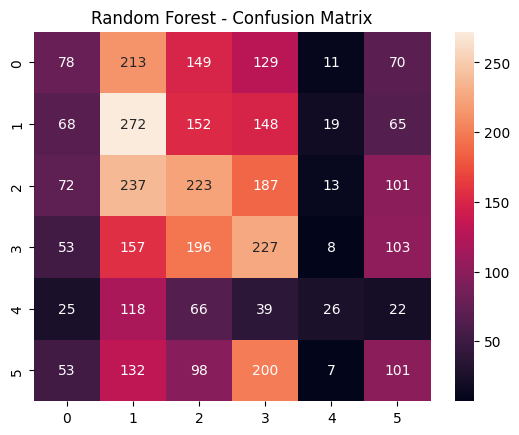


Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.23      0.14      0.18       650
           1       0.22      0.33      0.27       724
           2       0.26      0.35      0.29       833
           3       0.25      0.29      0.27       744
           4       0.25      0.01      0.02       296
           5       0.26      0.17      0.20       591

    accuracy                           0.24      3838
   macro avg       0.25      0.21      0.20      3838
weighted avg       0.25      0.24      0.23      3838



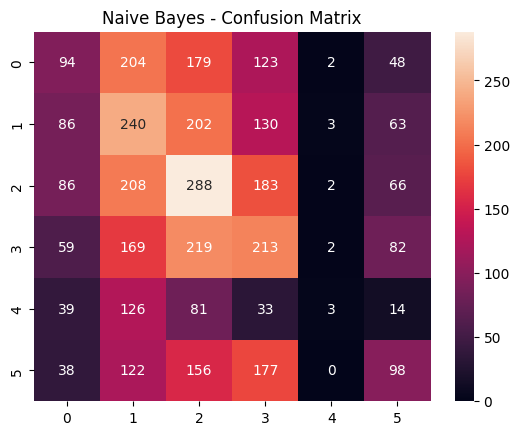


Model: KNN
              precision    recall  f1-score   support

           0       0.25      0.03      0.05       650
           1       0.20      0.69      0.31       724
           2       0.33      0.05      0.08       833
           3       0.21      0.31      0.25       744
           4       0.50      0.02      0.05       296
           5       0.33      0.04      0.06       591

    accuracy                           0.21      3838
   macro avg       0.30      0.19      0.13      3838
weighted avg       0.28      0.21      0.15      3838



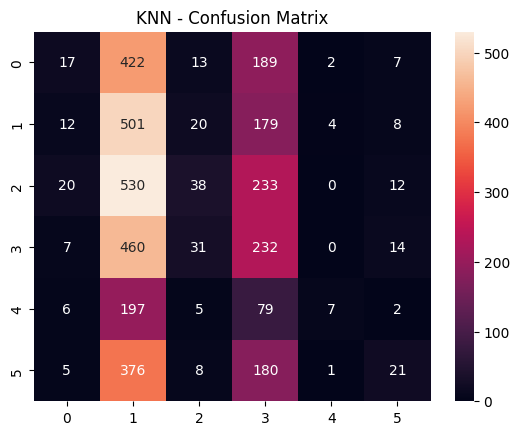


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.19      0.18      0.18       650
           1       0.25      0.31      0.28       724
           2       0.22      0.21      0.21       833
           3       0.22      0.21      0.21       744
           4       0.15      0.11      0.13       296
           5       0.18      0.17      0.17       591

    accuracy                           0.21      3838
   macro avg       0.20      0.20      0.20      3838
weighted avg       0.21      0.21      0.21      3838



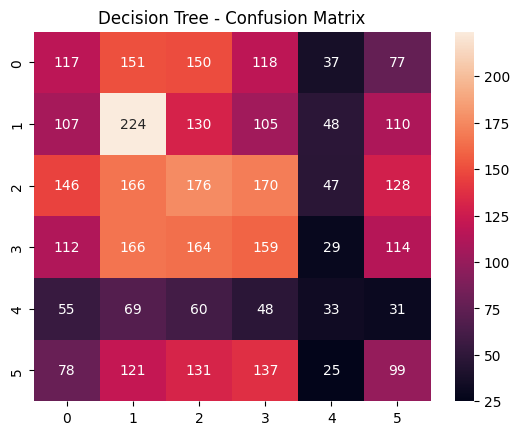


Model: SVM
              precision    recall  f1-score   support

           0       0.23      0.11      0.15       650
           1       0.25      0.42      0.31       724
           2       0.27      0.34      0.30       833
           3       0.25      0.30      0.27       744
           4       0.62      0.04      0.08       296
           5       0.31      0.17      0.22       591

    accuracy                           0.26      3838
   macro avg       0.32      0.23      0.22      3838
weighted avg       0.29      0.26      0.24      3838



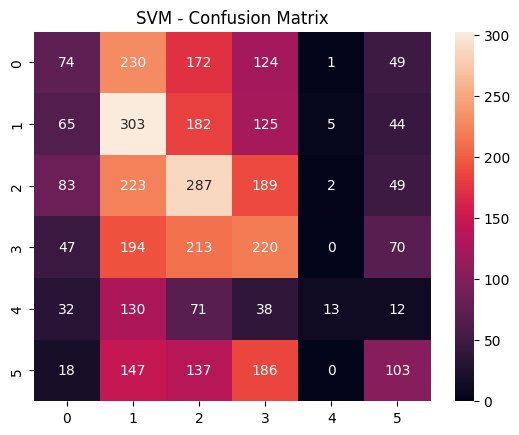

/home/rohan/Documents/fake news detection/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:41:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
              precision    recall  f1-score   support

           0       0.20      0.13      0.16       650
           1       0.24      0.38      0.30       724
           2       0.25      0.27      0.26       833
           3       0.25      0.27      0.26       744
           4       0.20      0.07      0.10       296
           5       0.20      0.16      0.18       591

    accuracy                           0.23      3838
   macro avg       0.22      0.21      0.21      3838
weighted avg       0.23      0.23      0.22      3838



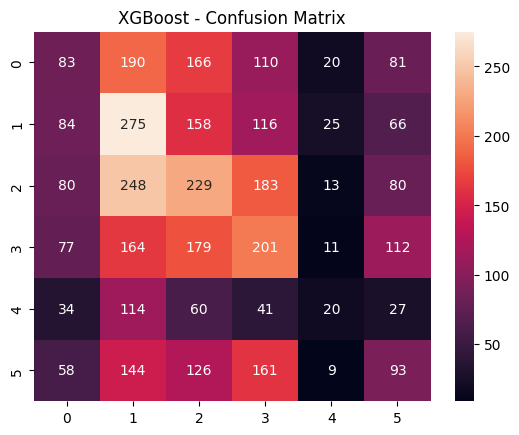

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


## saving the XGBoost model 

In [9]:
joblib.dump(models["SVM"], '../models/SVM_model.pkl')

['../models/SVM_model.pkl']